IMPORTING THE DATASET


In [ ]:
import pandas as pd
path ="/content/drive/MyDrive/Datasets/ModLanguageDetectionDataset.csv"
df=pd.read_csv(path)
print(df.head())

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING LIBRARIES

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt




CHECKING FOR THE NULL VALUES

In [ ]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
df["Language"].value_counts()

English       1588006
Marathi         69303
Hindi           14636
Bengali          4732
Urdu             2063
Malayalam        1472
French           1014
Tamil             871
Spanish           819
Portugeese        739
Italian           698
Russian           692
Sweedish          676
Dutch             546
Kannada           545
Arabic            536
Turkish           474
German            470
Danish            428
Greek             365
Telugu            271
Panjabi           196
Gujarati          168
Name: Language, dtype: int64

SPLITTING THE DATASET INTO TRAIN AND TEST DATASETS

In [ ]:
x = np.array(df["Text"])
y = np.array(df["Language"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

BUILDING A MULTINOMIALNB MODEL

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9946342233253468

GETTING THE OUTPUT

In [ ]:
user = input("Enter a Text: ")
df = cv.transform([user]).toarray()
output = model.predict(df)
print(output)

Enter a Text: what
['English']


CONFUSION MATRIX

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   152      0      0      0      1      0      0      0      0      4
       0      0      0     13      0      0      0      0      0      0
       0      0      0]
 [     0   1480      0      0     73      0      0      0      0      0
       0      0      0     38      0      0      0      0      0      0
       0      0      0]
 [     0      0    120      0      2      1      0      0      0      0
       0      0      0      7      0      0      0      0      4      0
       0      0      0]
 [     0      0      0    173      2      0      0      0      0      0
       0      0      0      5      0      0      0      1      0      0
       0      0      0]
 [     0      2      1      4 524056      2      1      0      0     17
       6      0      0     34      0      3      1      4      1      0
       0      0      0]
 [     0      0      0      0      1    318      0      0      0      1
       0      0      0      8      0      0      0      0      0      

PLOTING A LEARNING CURVE

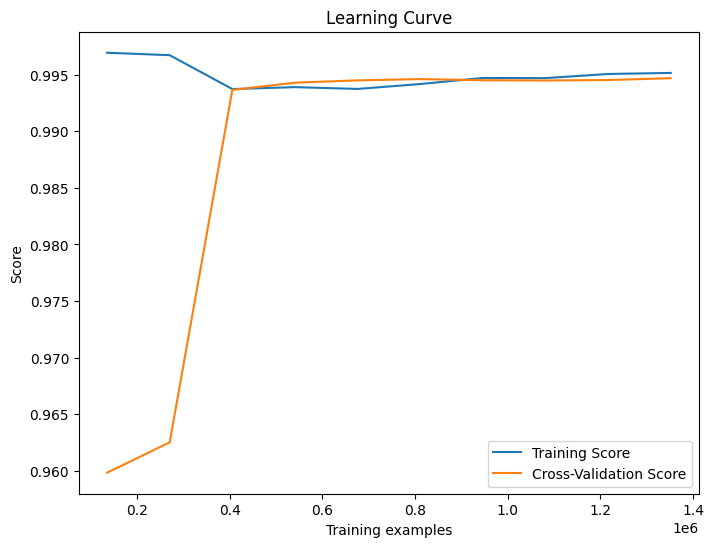

In [ ]:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


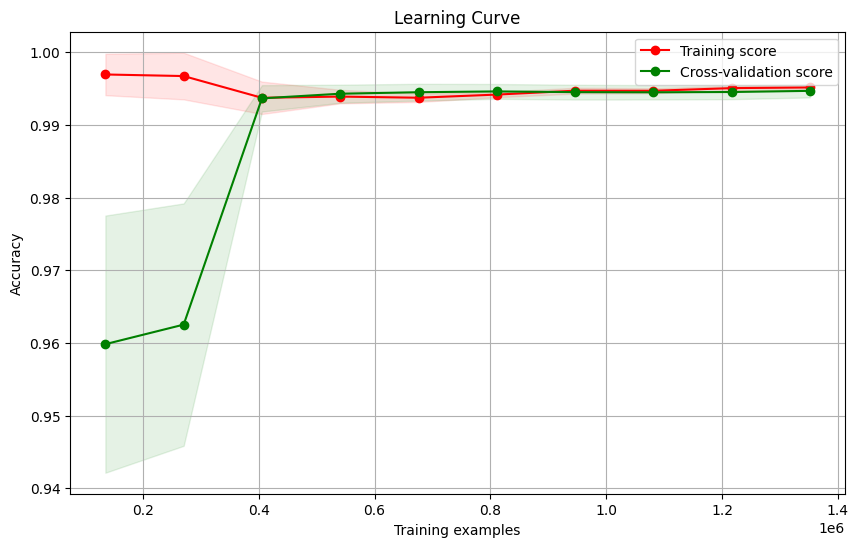

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Customize the plot
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()

# Show the plot
plt.show()
